In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
df=pd.read_csv('data/fraud.csv', index_col = 0)
#Update the DataFrame df by keeping all rows and dropping the first column.
#Explanation:
# df.iloc is used to access rows and columns by position (not by labels).
# : means all rows.
# 1: means columns from position 1 to the end.
# Column index 0 is the first column, so this skips the first column.
df = df.iloc[:,1:]
print(df.columns)

# 2. checking the null value contain in the dataset or not
df.info()
print("--------------------------------")
print(df.isnull().sum())
print("--------------------------------")


# 3. Define independent (X) and dependent (y) variables
# Target: Amount (continuous)
# Features: All except Amount, Class, and ID columns
X = df.drop(columns=["Amount", "Class"])
y = df["Amount"]
print(X.shape, y.shape)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 21693 entries, 0 to 21692
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      21693 non-null  float64
 1   V2      21693 non-null  float64
 2   V3      21693 non-null  float64
 3   V4      21693 non-null  float64
 4   V5      21693 non-null  float64
 5   V6      21693 non-null  float64
 6   V7      21693 non-null  float64
 7   V8      21693 non-null  float64
 8   V9      21693 non-null  float64
 9   V10     21693 non-null  float64
 10  V11     21693 non-null  float64
 11  V12     21693 non-null  float64
 12  V13     21693 non-null  float64
 13  V14     21693 non-null  float64
 14  V15     21693 non-null  float64
 15  V16     2169

In [71]:
from sklearn.model_selection import train_test_split

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
print(X_train.shape, X_test.shape)

(13015, 28) (8678, 28)


In [97]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# 5. Pipeline for Linear Regression
lin_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

# 6. Pipeline for Polynomial Regression (degree=2)
poly_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

# 7. Fit models
lin_pipeline.fit(X_train, y_train)
poly_pipeline.fit(X_train, y_train)

# 8. Predictions
y_pred_lin = lin_pipeline.predict(X_test)
y_pred_poly = poly_pipeline.predict(X_test)
print(y_pred_lin)
print(y_pred_poly)

[  18.49042271   31.55277959   41.59237886 ... -132.5567909    11.12098078
   20.90532711]
[  7.47558505  37.13231401  35.91713999 ... -27.80379981  -0.21409611
  15.49626989]


In [92]:
#--------------------------------------------------
## 9. Model Evaluation ## 
#--------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)

poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
## MSE Lower is better
## R² higher is better close to 1
print("Linear Regression: MSE =", lin_mse, ", R² =", lin_r2)
print("Polynomial Regression: MSE =", poly_mse, ", R² =", poly_r2)

Linear Regression: MSE = 9444.48500635245 , R² = 0.8494555102722239
Polynomial Regression: MSE = 13766905.346443895 , R² = -218.443594766362


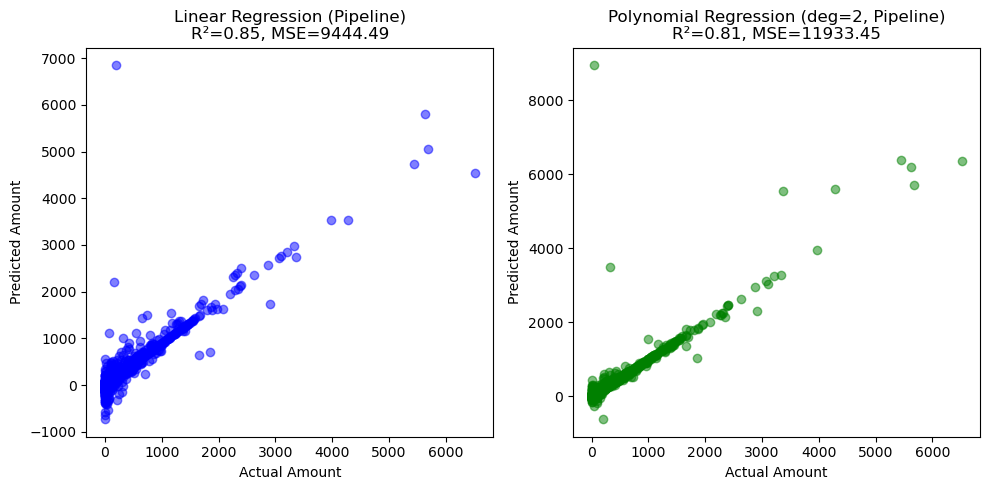

In [89]:
# 10. Plot results
plt.figure(figsize=(10, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5, color="blue")
plt.xlabel("Actual Amount")
plt.ylabel("Predicted Amount")
plt.title(f"Linear Regression (Pipeline)\nR²={lin_r2:.2f}, MSE={lin_mse:.2f}")

# Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.5, color="green")
plt.xlabel("Actual Amount")
plt.ylabel("Predicted Amount")
plt.title(f"Polynomial Regression (deg=2, Pipeline)\nR²={poly_r2:.2f}, MSE={poly_mse:.2f}")

plt.tight_layout()
plt.show()